In [1]:
# Data downloaded from 10.5281/zenodo.13823014

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, gaussian_kde

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [4]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

# Load model performances
personalized = h5py.File(
    os.path.join(SCRATCH, "evaluation_metric/clipnet_test_predictions.h5"),
)
reference = h5py.File(
    os.path.join(SCRATCH, "clipnet_reference_test_predictions.h5")
)

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


PearsonRResult(statistic=0.965676377748627, pvalue=0.0)

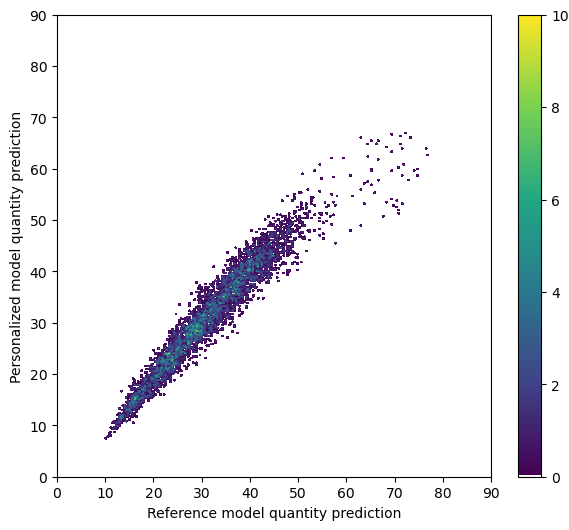

In [50]:
# Plot predicted vs observed quantities

quantity = pd.DataFrame(
    {
        "personalized": personalized["quantity"][:, 0],
        "reference": reference["quantity"][:, 0],
    }
)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = ax.scatter_density(
    quantity.reference, 
    quantity.personalized,
    cmap=white_viridis
)
fig.colorbar(density)
ax.set_xlim(-0, 90)
ax.set_ylim(-0, 90)
#ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
#ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Personalized model quantity prediction")
ax.set_xlabel("Reference model quantity prediction")
plt.savefig("img/personalize_v_reference_quantity_prediction.pdf")

pearsonr(quantity.reference, quantity.personalized)

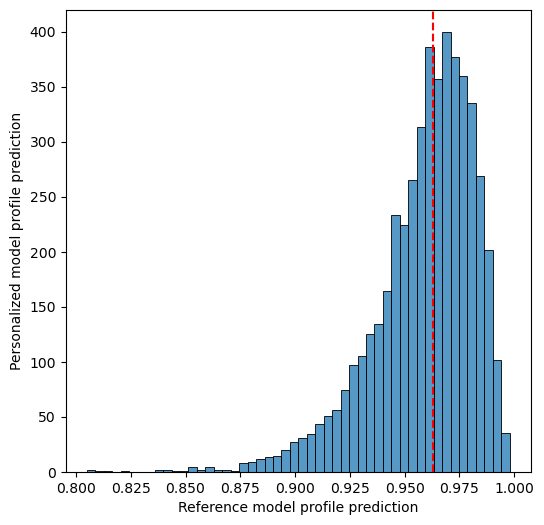

In [57]:
# Plot predicted vs observed profiles

profile = pd.DataFrame(
    personalized["track"][:]
).corrwith(
    pd.DataFrame(reference["track"][:]), axis=1
)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = sns.histplot(profile, bins=50)
ax.axvline(profile.median(), color="red", linestyle="--")
#ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
#ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Personalized model profile prediction")
ax.set_xlabel("Reference model profile prediction")
plt.savefig("img/personalize_v_reference_profile_prediction.pdf")

array([[0.        , 0.        , 0.        , ..., 0.0058793 , 0.15922028,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02953379, 0.        , 0.0246097 , ..., 0.        , 0.        ,
        0.        ],
       [0.00134108, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)